## This is the code for implementing a neural network to predict whether Titanic participants live or die based on age, fare, gender, and class

##### Author: Nicholas LaMantia
##### Date: 4/12/2025
##### Class: CS-411 Artificial Intelligence 

### Imports

In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tf.random.set_seed(42)


### Reading Data

###### Target: Survived

###### Features: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

###### Features we're using: Age, Sex, Pclass, Fare


In [86]:
fullData = pd.read_csv("C:\\Users\\nicke\\Downloads\\AI_CS411\\titanic.csv")



### Drop Passengers with missing values 

In [87]:
fullData = fullData.drop(columns=[
    'PassengerId', 'Embarked', 'SibSp', 'Parch', 'Name', 'Ticket', 'Cabin'])
fullData = fullData.dropna()
#inplace = True



### One-hot encode Sex to 0 or 1 (male or female respectively)

In [88]:
fullData = pd.get_dummies(fullData, columns=['Sex'], drop_first=True)
print(fullData.columns)

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_male'], dtype='object')


### Section Inputs and Outputs

In [89]:
inputs = ['Age', 'Sex_male', 'Fare', 'Pclass']
outputs = ['Survived']
inputsAF = ['Age', 'Fare']
inputsAS = ['Age', 'Sex_male']
inputsAP = ['Age', 'Pclass']
inputsSF = ['Sex_male', 'Fare']
inputsSP = ['Sex_male', 'Pclass']
inputsFP = ['Fare', 'Pclass']


x = fullData[inputsAF].values
y = fullData[outputs].values
xAF = fullData[inputsAF].values


### Normalize the inputs (only)

In [90]:
stScaler = StandardScaler()
x = stScaler.fit_transform(x)
xAF = stScaler.fit_transform(xAF)


### Split the data into train and test categories 

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_trainAF, x_testAF, y_trainAF, y_testAF = train_test_split(xAF, y, test_size=0.2, random_state=42)

# Create a list of accuracies to store the results
accuracies = []
val_acc = []
# Dictionary to hold val_accuracy history for each activation
val_accuracies_per_activation = {}
# Create a list of loss to store the results
losses = []
# Create a list of used activation functions to store the results
act_fun = []

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (571, 2)
y_train shape:  (571, 1)


### Now, add an input layer and hidden layer (add activation functions)

##### Hidden Layers: 3 (Including Output layer)

##### Layers have 10, 5, and 1 units each

##### We then compile using SGD optimizer (over adam) 

##### We then train a model and evaluate it

c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.7027 


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 13s 475us/step


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6606 - loss: 0.6645 


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 15s 542us/step


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6496 - loss: 0.6592 


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 14s 524us/step


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6517 - loss: 0.7001 


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 14s 506us/step


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6618 - loss: 0.6610 


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 14s 522us/step


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6741 - loss: 0.6831 


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 18s 651us/step


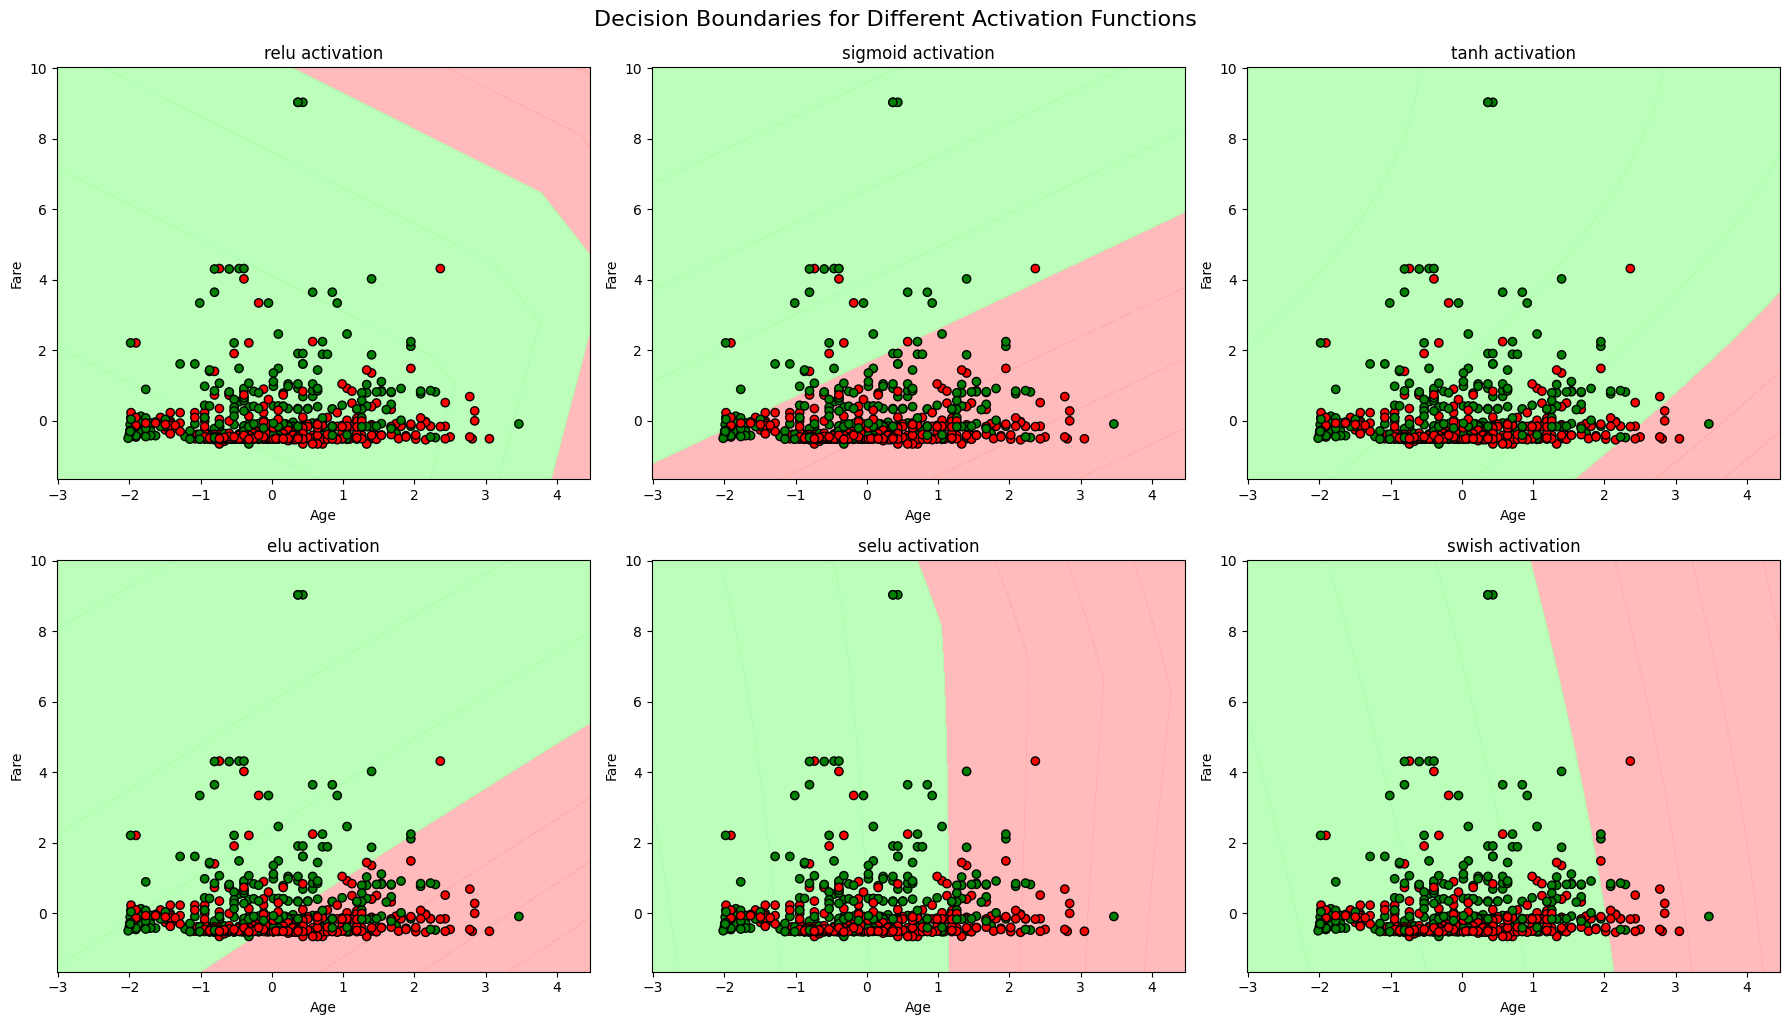

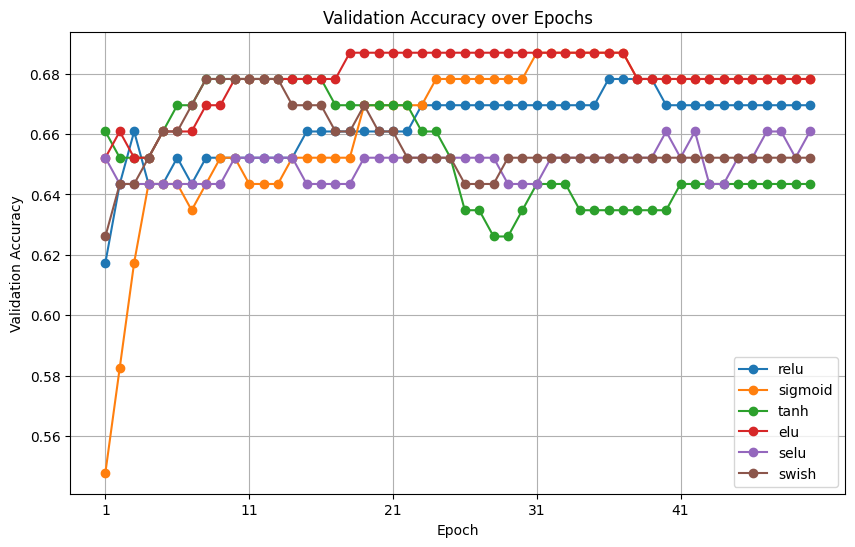

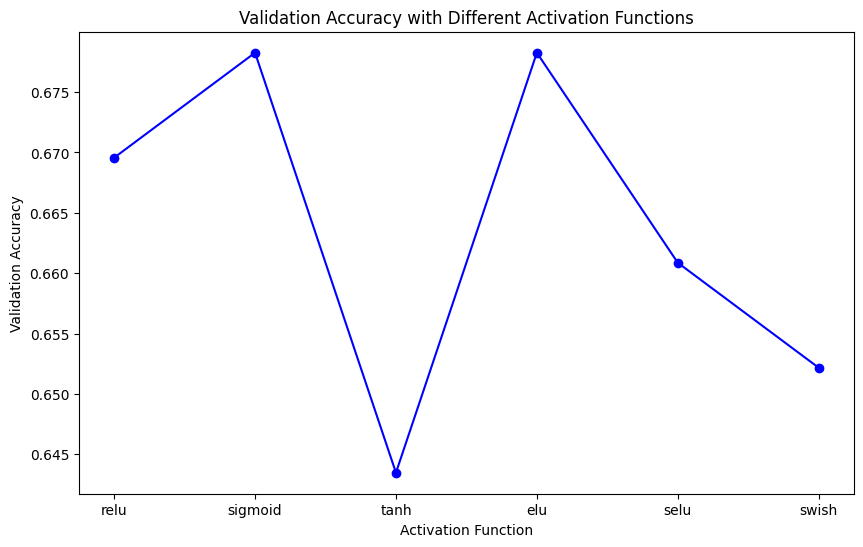

In [ ]:
activation_functions = ["relu", "sigmoid", "tanh", "elu", "selu", "swish"]

# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten 2D subplot grid into 1D

# Meshgrid setup
h = 0.01
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]



for i, activation in enumerate(activation_functions):
    # Create the model (Sequential means layers are stacked one after another)
    myModel = Sequential()

    # Add layers to the model
    myModel.add(Dense(10, input_dim=x_train.shape[1], activation=activation))
    myModel.add(Dense(5, activation=activation))
    # add the activation function used to the list
    act_fun.append(activation)


    # Add the output layer
    myModel.add(Dense(1, activation='sigmoid'))

    # Compile the model
    myModel.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.01), metrics=['accuracy'])

    # Train the model
    history = myModel.fit(x_train, y_train, epochs=50, batch_size=9, validation_split=0.2, verbose = 0)


    # Evaluate the model
    loss, accuracy = myModel.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    losses.append(loss)
    val_acc.append(history.history['val_accuracy'][-1])
    val_accuracies_per_activation[activation] = history.history['val_accuracy']

    
    myModel.summary()

    # Fill grid with dummy values for other features
    #grid_full = np.zeros((grid.shape[0], x_train.shape[1]))
    mean_vals = x_train.mean(axis=0)
    grid_full = np.tile(mean_vals, (grid.shape[0], 1))
    grid_full[:, 0] = grid[:, 0]  # Age
    grid_full[:, 1] = grid[:, 1]  # Fare

    # Predict on mesh grid
    scaled_grid = stScaler.transform(grid_full)
    Z = myModel.predict(scaled_grid, verbose=1)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']), alpha=0.8)
    axes[i].scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['red', 'green']))
    axes[i].set_title(f"{activation} activation")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Fare")




plt.tight_layout()
plt.suptitle("Decision Boundaries for Different Activation Functions", fontsize=16, y=1.02)
plt.show()

plt.figure(figsize=(10, 6))

for activation in activation_functions:
    plt.plot(range(1, 50 + 1), val_accuracies_per_activation[activation], 
             marker='o', label=f'{activation}')

plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()



# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(activation_functions, val_acc, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.show()



### Print information about the activation function, accuracy, and loss

In [93]:
for i, activation in enumerate(activation_functions):
    print(f"Activation Function: {activation}, Accuracy: {accuracies[i]}, Loss: {losses[i]}")

Activation Function: relu, Accuracy: 0.6503496766090393, Loss: 0.7286773920059204
Activation Function: sigmoid, Accuracy: 0.6223776340484619, Loss: 0.690726637840271
Activation Function: tanh, Accuracy: 0.6153846383094788, Loss: 0.694580614566803
Activation Function: elu, Accuracy: 0.6153846383094788, Loss: 0.7247013449668884
Activation Function: selu, Accuracy: 0.6363636255264282, Loss: 0.6919161677360535
Activation Function: swish, Accuracy: 0.6433566212654114, Loss: 0.7216775417327881


### Plot the different charts including Accuracy versus activation function and loss versus activation function


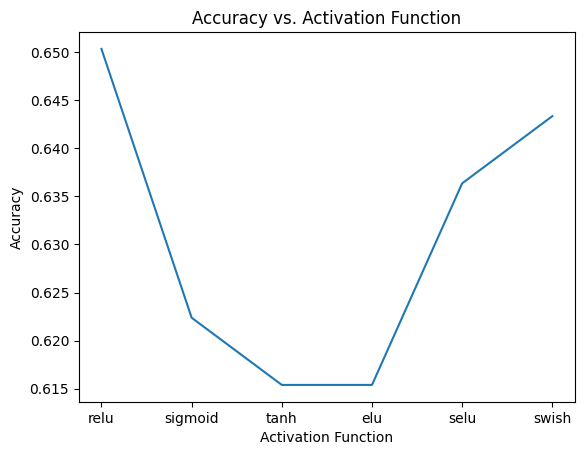

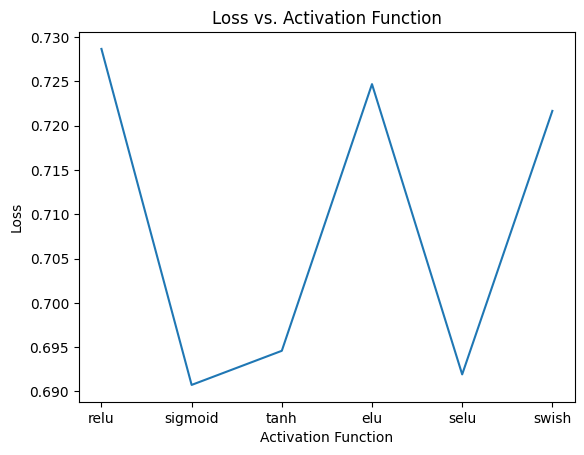

In [94]:

plt.plot(activation_functions, accuracies)
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Activation Function")
plt.show()

plt.plot(activation_functions, losses)
plt.xlabel("Activation Function")
plt.ylabel("Loss")
plt.title("Loss vs. Activation Function")
plt.show()

### More Plots to visualize results

27362/27362 ━━━━━━━━━━━━━━━━━━━━ 18s 646us/step


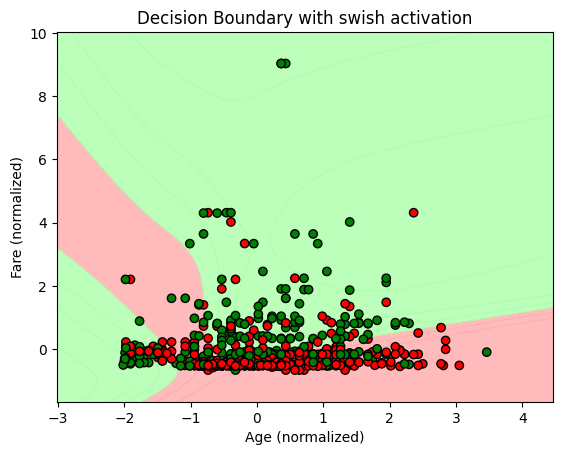

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[74 13]
 [38 18]]
ROC AUC Score:
0.5964696223316913
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        87
           1       0.58      0.32      0.41        56

    accuracy                           0.64       143
   macro avg       0.62      0.59      0.58       143
weighted avg       0.63      0.64      0.61       143



In [95]:
# Create a meshgrid of values for plotting
h = 0.01
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# flatted the grid and predict 
grid = np.c_[xx.ravel(), yy.ravel()]
Z = myModel.predict(grid)
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']), alpha=0.8)
plt.scatter(xAF[:, 0], xAF[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['red', 'green']))
plt.xlabel("Age (normalized)")
plt.ylabel("Fare (normalized)")
plt.title(f"Decision Boundary with {activation} activation")
plt.show()

y_pred_prob = myModel.predict(x_test) 
y_pred_class = (y_pred_prob > 0.5).astype(int)  

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_prob))


print("Classification Report:")
print(classification_report(y_test, y_pred_class))


### Conclusions: 
We can do the same process with the other inputs (features) such as Sex and Pclass and look at the decision boundaries.

The reLU or swish activation function seems to be the best function to use for creating the network as it has a low loss value compared to the other functions, as well as it shares a high accuracy between sigmoid and elu. 

Based on the data above, we can conclude that if you were a woman, or if you were younger, you had a higher chance of survival. This can be said because of the data and because those groups were prioritized when loading lifeboats as the boat was sinking. 

